In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def open_all_files(directory):
    try:
        press, enerdens, bardens = None, None, None
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.isfile(filepath):
                print(f"Opening {filename}")
                if "Press_Final_PAR_" in filename:
                    press = pd.read_csv(
                        filepath, sep="\t", header=None, names=["mub", "T", "P"]
                    )
                elif "EnerDens_Final_" in filename:
                    enerdens = pd.read_csv(
                        filepath, sep="\t", header=None, names=["mub", "T", "e"]
                    )
                elif "BarDens_Final_" in filename:
                    bardens = pd.read_csv(
                        filepath, sep="\t", header=None, names=["mub", "T", "nb"]
                    )

        if not all([press is not None, enerdens is not None, bardens is not None]):
            raise ValueError("Missing required data files!")

        return press, enerdens, bardens

    except Exception as e:
        print(f"Error: {e}")
        return None, None, None

In [5]:
directory = "/Users/tomaspolednicek/Desktop/EoS-script/data"  # Nastavte správnou cestu k souborům
press, enerdens, bardens = open_all_files(directory)

Opening Press_Final_PAR_143_350_3_93_143_286_3D.dat
Opening EnerDens_Final_PAR_143_350_3_93_143_286_3D.dat
Opening EoS.dat
Opening chiraleos.dat
Opening CorrLength_Final_PAR_143_350_3_93_143_286_3D.dat
Opening SpSound_Final_PAR_143_350_3_93_143_286_3D.dat
Opening BarDens_Final_PAR_143_350_3_93_143_286_3D.dat
Opening Entr_Final_PAR_143_350_3_93_143_286_3D.dat
Opening Chi2_Final_PAR_143_350_3_93_143_286_3D.dat


Text(0.5, 0.5, 'T')

<Figure size 640x480 with 0 Axes>

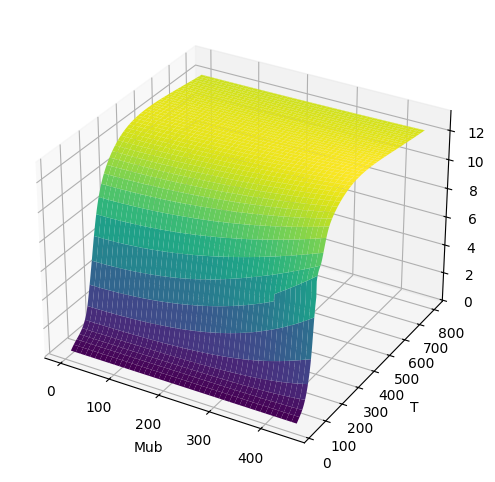

In [6]:
fig = plt.figure()
pivot = enerdens.pivot(index="mub", columns="T", values="e")
mub_values = pivot.index.values
T_values = pivot.columns.values
e_values = pivot.values

MUB, T = np.meshgrid(mub_values, T_values, indexing="ij")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(MUB, T, e_values, cmap="viridis")

ax.set_xlabel("Mub")
ax.set_ylabel("T")

In [18]:
from multiprocessing import Pool


def f(x):
    return x * x


if __name__ == "__main__":
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

Process SpawnPoolWorker-36:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'f' on <module '__main__' (built-in)>
Process SpawnPoolWorker-35:
Process SpawnPoolWorker-37:
Traceback (most recent call last):
  File "/Library/Developer/Command

KeyboardInterrupt: 

In [ ]:
N = 200000
min_e, max_e = -0.00999, 13.6
e_grid = [min_e + i * (max_e - min_e) / N for i in range(N)]

for i in e_grid:
    print(i)
    # Do something with i
    # e.g. calculate something, plot, etc.
    # For example, if you want to calculate the energy density:
    # energy_density = some_function(i)
    # print(energy_density)